### Telecom Churn Case Study


##### Problem Statement: 


In the telecommunications sector, customers have the option to select from various service providers and frequently switch between operators. Within this fiercely competitive market, the telecom industry witnesses an annual churn rate averaging between 15-25%. Recognizing that acquiring a new customer entails a cost 5-10 times higher than retaining an existing one, the emphasis has shifted towards prioritizing customer retention over customer acquisition.
Within this project, our focus will be on scrutinizing customer-level data from a prominent telecommunications company. Our objective is to construct predictive models that can effectively pinpoint customers with a heightened risk of churn. Additionally, we aim to discern the primary indicators or factors contributing to customer churn through our analysis.


### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from sklearn.metrics import precision_recall_curve
from sklearn import metrics
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import IncrementalPCA

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import roc_auc_score

from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve


pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 300)

import warnings
warnings.filterwarnings('ignore')

### Data Understanding

In [2]:
churn_pred = pd.read_csv("train.csv")

In [3]:
churn_pred.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,6/12/2014,7/10/2014,8/26/2014,0,0,0,NaN,7/8/2014,NaN,NaN,1.0,NaN,NaN,145.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,Na

In [4]:
churn_pred.shape

(69999, 172)

In [5]:
churn_pred.describe()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.0,69297.0,69297.0,69297.0,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.0,67312.0,66296.0,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.0,67312.0,66296.0,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,69999.000000,69999.000000

In [6]:
churn_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 172 entries, id to churn_probability
dtypes: float64(135), int64(28), object(9)
memory usage: 91.9+ MB


In [7]:
# Checking null value 
churn_pred.isna().sum()/len(churn_pred)*100

id                           0.000000
circle_id                    0.000000
loc_og_t2o_mou               1.002871
std_og_t2o_mou               1.002871
loc_ic_t2o_mou               1.002871
last_date_of_month_6         0.000000
last_date_of_month_7         0.570008
last_date_of_month_8         1.047158
arpu_6                       0.000000
arpu_7                       0.000000
arpu_8                       0.000000
onnet_mou_6                  3.954342
onnet_mou_7                  3.838626
onnet_mou_8                  5.290076
offnet_mou_6                 3.954342
offnet_mou_7                 3.838626
offnet_mou_8                 5.290076
roam_ic_mou_6                3.954342
roam_ic_mou_7                3.838626
roam_ic_mou_8                5.290076
roam_og_mou_6                3.954342
roam_og_mou_7                3.838626
roam_og_mou_8                5.290076
loc_og_t2t_mou_6             3.954342
loc_og_t2t_mou_7             3.838626
loc_og_t2t_mou_8             5.290076
loc_og_t2m_m

In [8]:
# checking for duplicates
churn_pred.drop_duplicates(subset=None, inplace=True)
churn_pred.shape

(69999, 172)

### Data Preparation

In [9]:
# some columns do not have minimum value 1
recharge_cols = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 
                 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 
                 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 
                 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 
                 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 
                 ]

churn_pred[recharge_cols].describe(include='all')

,total_rech_data_6,total_rech_data_7,total_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8
count,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000
mean,2.467612,2.679989,2.652441,1.865323,2.056311,2.016018,0.602288,0.623678,0.636423,126.500000,126.402071,125.374925,192.831096,201.455940,196.815792
std,2.794610,3.073472,3.101265,2.566377,2.799916,2.728246,1.279297,1.401230,1.457058,109.352573,109.459266,109.648799,190.623115,198.346141,192.280532
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,25.000000,25.000000,25.000000,82.000000,92.000000,84.000000
50%,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,145.000000,145.000000,145.000000,154.000000,154.000000,154.000000
75%,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,177.000000,177.000000,179.000000,252.000000,252.000000,252.000000
max,61.000000,54.000000,60.000000,42.000000,48.000000,44.000000,29.000000,34.000000,45.000000,1555.000000,1555.000000,1555.000000,5920.000000,4365.000000,4076.000000


####
We have the option to generate a novel feature named "total_rech_amt_data" by combining "total_rech_data" and "av_rech_amt_data" to represent the amount spent by customers on data usage.

Additionally, since the minimum value is 1, we can fill the missing values with 0, assuming that no recharges were carried out by the customer during that period.

The absence of both recharge date and recharge value simultaneously indicates that the customer did not perform a recharge during that specific period.

In [10]:
zero_impute = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 
        'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 
        'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8'
       ]

In [11]:
# impute missing values with 0
churn_pred[zero_impute] = churn_pred[zero_impute].apply(lambda x: x.fillna(0))

In [12]:
# Now, it is essential to ensure that the values are correctly filled, and we can verify this by examining the "Missing Value Ratio."
churn_pred[zero_impute].isnull().sum()*100/churn_pred.shape[1]

total_rech_data_6     0.0
total_rech_data_7     0.0
total_rech_data_8     0.0
av_rech_amt_data_6    0.0
av_rech_amt_data_7    0.0
av_rech_amt_data_8    0.0
max_rech_data_6       0.0
max_rech_data_7       0.0
max_rech_data_8       0.0
dtype: float64

In [13]:
churn_pred[zero_impute].describe(include='all')

,total_rech_data_6,total_rech_data_7,total_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8
count,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000
mean,0.619309,0.683981,0.697867,48.395787,51.415168,51.782975,31.748339,32.260075,32.986614
std,1.762010,1.943193,1.973434,126.923180,133.246541,131.291162,77.519536,78.069163,78.808337
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,8.000000,17.000000,23.000000,8.000000,14.000000,17.000000
max,61.000000,54.000000,60.000000,5920.000000,4365.000000,4076.000000,1555.000000,1555.000000,1555.000000


In [14]:
# creating column types by there types
id_col = ['id', 'circle_id']

date_col = ['last_date_of_month_6',
             'last_date_of_month_7',
             'last_date_of_month_8',             
             'date_of_last_rech_6',
             'date_of_last_rech_7',
             'date_of_last_rech_8',             
             'date_of_last_rech_data_6',
             'date_of_last_rech_data_7',
             'date_of_last_rech_data_8'             
            ]

cat_col =  ['night_pck_user_6',
             'night_pck_user_7',
             'night_pck_user_8',             
             'fb_user_6',
             'fb_user_7',
             'fb_user_8'             
            ]

num_col = [column for column in churn_pred.columns if column not in id_col + date_col + cat_col]

# print the number of columns in each list
print("#ID cols: %d\n#Date cols:%d\n#Numeric cols:%d\n#Category cols:%d" % (len(id_col), len(date_col), len(num_col), len(cat_col)))

# check if we have missed any column or not
print(len(id_col) + len(date_col) + len(num_col) + len(cat_col) == churn_pred.shape[1])

#ID cols: 2
#Date cols:9
#Numeric cols:155
#Category cols:6
True


In [15]:
# drop id and date columns
churn_pred = churn_pred.drop(id_col + date_col, axis=1)
#check the shape again
churn_pred.shape

(69999, 161)

In [16]:
# replacing missing values with '-1' in categorical columns
churn_pred[cat_col] = churn_pred[cat_col].apply(lambda x: x.fillna(-1))

In [17]:
# missing value ratio
churn_pred[cat_col].isnull().sum()*100/churn_pred.shape[0]

night_pck_user_6    0.0
night_pck_user_7    0.0
night_pck_user_8    0.0
fb_user_6           0.0
fb_user_7           0.0
fb_user_8           0.0
dtype: float64

### Dropping variables where threshold is greater than 70 percent

In [18]:
initial_cols = churn_pred.shape[1]

missing_threshold = 0.7

include_cols = list(churn_pred.apply(lambda column: True if column.isnull().sum()/churn_pred.shape[0] < missing_threshold else False))

drop_missing = pd.DataFrame({'features':churn_pred.columns , 'include': include_cols})
drop_missing.loc[drop_missing.include == True,:]

,features,include
0,loc_og_t2o_mou,True
1,std_og_t2o_mou,True
2,loc_ic_t2o_mou,True
3,arpu_6,True
4,arpu_7,True
5,arpu_8,True
6,onnet_mou_6,True
7,onnet_mou_7,True
8,onnet_mou_8,True
9,offnet_mou_6,True


In [19]:
#checking the shape of a dataframe
churn_pred.shape

(69999, 161)

In [20]:
churn_pred.isnull().sum()*100/churn_pred.shape[0]

loc_og_t2o_mou         1.002871
std_og_t2o_mou         1.002871
loc_ic_t2o_mou         1.002871
arpu_6                 0.000000
arpu_7                 0.000000
arpu_8                 0.000000
onnet_mou_6            3.954342
onnet_mou_7            3.838626
onnet_mou_8            5.290076
offnet_mou_6           3.954342
offnet_mou_7           3.838626
offnet_mou_8           5.290076
roam_ic_mou_6          3.954342
roam_ic_mou_7          3.838626
roam_ic_mou_8          5.290076
roam_og_mou_6          3.954342
roam_og_mou_7          3.838626
roam_og_mou_8          5.290076
loc_og_t2t_mou_6       3.954342
loc_og_t2t_mou_7       3.838626
loc_og_t2t_mou_8       5.290076
loc_og_t2m_mou_6       3.954342
loc_og_t2m_mou_7       3.838626
loc_og_t2m_mou_8       5.290076
loc_og_t2f_mou_6       3.954342
loc_og_t2f_mou_7       3.838626
loc_og_t2f_mou_8       5.290076
loc_og_t2c_mou_6       3.954342
loc_og_t2c_mou_7       3.838626
loc_og_t2c_mou_8       5.290076
loc_og_mou_6           3.954342
loc_og_m

In [21]:
num_col = [column for column in churn_pred.columns if column not in id_col + date_col + cat_col]
num_col

['loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou

In [22]:
#imputing with meadian for num_cols
churn_pred[num_col] = churn_pred[num_col].apply(lambda x: x.fillna(x.median()))

In [23]:
churn_pred.isna().sum()*100/churn_pred.shape[0]

loc_og_t2o_mou        0.0
std_og_t2o_mou        0.0
loc_ic_t2o_mou        0.0
arpu_6                0.0
arpu_7                0.0
arpu_8                0.0
onnet_mou_6           0.0
onnet_mou_7           0.0
onnet_mou_8           0.0
offnet_mou_6          0.0
offnet_mou_7          0.0
offnet_mou_8          0.0
roam_ic_mou_6         0.0
roam_ic_mou_7         0.0
roam_ic_mou_8         0.0
roam_og_mou_6         0.0
roam_og_mou_7         0.0
roam_og_mou_8         0.0
loc_og_t2t_mou_6      0.0
loc_og_t2t_mou_7      0.0
loc_og_t2t_mou_8      0.0
loc_og_t2m_mou_6      0.0
loc_og_t2m_mou_7      0.0
loc_og_t2m_mou_8      0.0
loc_og_t2f_mou_6      0.0
loc_og_t2f_mou_7      0.0
loc_og_t2f_mou_8      0.0
loc_og_t2c_mou_6      0.0
loc_og_t2c_mou_7      0.0
loc_og_t2c_mou_8      0.0
loc_og_mou_6          0.0
loc_og_mou_7          0.0
loc_og_mou_8          0.0
std_og_t2t_mou_6      0.0
std_og_t2t_mou_7      0.0
std_og_t2t_mou_8      0.0
std_og_t2m_mou_6      0.0
std_og_t2m_mou_7      0.0
std_og_t2m_m

### 

In the context of churn prediction, we consider three distinct phases in the customer lifecycle:

The 'good & action' phase, which encompasses Month 6 and Month 7.
The 'churn' phase, which corresponds to Month 8.
Given the three-month window for analysis, the initial two months constitute the 'good & action' phase, while the third month represents the 'churn' phase


## Filtering high-value customers

In [24]:
# calculate the total data recharge amount for June and July: number of recharges * average recharge amount
churn_pred['total_data_rech_6'] = churn_pred.total_rech_data_6 * churn_pred.av_rech_amt_data_6
churn_pred['total_data_rech_7'] = churn_pred.total_rech_data_7 * churn_pred.av_rech_amt_data_7

In [25]:
# calculate total recharge amount for June and July: call recharge amount + data recharge amount
churn_pred['amt_data_6'] = churn_pred.total_rech_amt_6 + churn_pred.total_data_rech_6
churn_pred['amt_data_7'] = churn_pred.total_rech_amt_7 + churn_pred.total_data_rech_7

In [26]:
# calculate average recharge done by customer in June and July
churn_pred['av_amt_data_6_7'] = (churn_pred.amt_data_6 + churn_pred.amt_data_7)/2

In [27]:
# look at the 70th percentile recharge amount
print("Recharge amount 70th percentile: {0}".format(churn_pred.av_amt_data_6_7.quantile(0.7)))

Recharge amount 70th percentile: 477.5


In [28]:
churn_pred.head()
churn_pred.shape

(69999, 166)

### Keep only those customers who have recharged their mobiles with an amount greater than or equal to the 70th percentile.

In [29]:
churn_pred_filtered = churn_pred.loc[churn_pred.av_amt_data_6_7 >= churn_pred.av_amt_data_6_7.quantile(0.7), :]
churn_pred_filtered = churn_pred_filtered.reset_index(drop=True)

In [30]:
churn_pred_filtered.shape

(21013, 166)

In [31]:
# deleting variables created to filter high-value customers
churn_pred_filtered = churn_pred_filtered.drop(['total_data_rech_6', 'total_data_rech_7',
                                      'amt_data_6', 'amt_data_7', 'av_amt_data_6_7'], axis=1)

In [32]:
churn_pred_filtered.shape

(21013, 161)

### Deriving churn

0    27.534679
1     2.484321
Name: churn_probability, dtype: float64


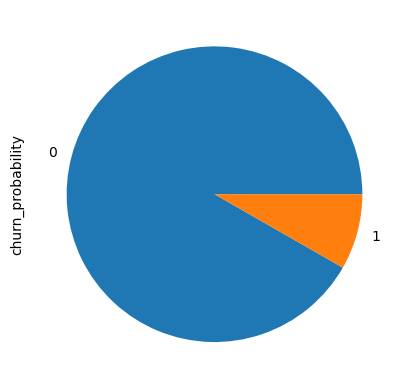

In [33]:
# lets find out churn/non churn percentage
print((churn_pred_filtered['churn_probability'].value_counts()/len(churn_pred))*100)
((churn_pred_filtered['churn_probability'].value_counts()/len(churn_pred))*100).plot(kind="pie")
plt.show()

## Equivalent to 90 % of customers are not churning. There is a possibility of class imbalance

In [34]:
churn_pred_filtered.drop(['av_rech_amt_data_6',
                   'total_rech_data_6','total_rech_amt_6',
                  'av_rech_amt_data_7',
                   'total_rech_data_7','total_rech_amt_7'], axis=1, inplace=True)

###
New columns can be generated to define the variables during the 'good' phase, and subsequently, the individual 6th and 7th-month variables can be discarded. Before proceeding with the handling of remaining missing values, it is advisable to examine the collinearity among the independent variables and comprehend their interdependencies.

In [35]:
# lets check the correlation amongst the independent variables, drop the highly correlated ones
churn_corr = churn_pred_filtered.corr()
churn_corr.loc[:,:] = np.tril(churn_corr, k=-1)
churn_corr = churn_corr.stack()
churn_corr
churn_corr[(churn_corr > 0.80) | (churn_corr < -0.80)].sort_values(ascending=False)

sachet_2g_7         count_rech_2g_7       0.982175
sachet_2g_8         count_rech_2g_8       0.980162
sachet_2g_6         count_rech_2g_6       0.978498
total_rech_amt_8    arpu_8                0.958953
fb_user_6           night_pck_user_6      0.957744
isd_og_mou_8        isd_og_mou_7          0.956635
fb_user_7           night_pck_user_7      0.955499
fb_user_8           night_pck_user_8      0.954382
arpu_2g_7           arpu_3g_7             0.939613
arpu_2g_6           arpu_3g_6             0.937203
isd_og_mou_7        isd_og_mou_6          0.936012
arpu_2g_8           arpu_3g_8             0.935749
isd_og_mou_8        isd_og_mou_6          0.934200
total_ic_mou_6      loc_ic_mou_6          0.901348
total_ic_mou_8      loc_ic_mou_8          0.898511
sachet_2g_8         total_rech_data_8     0.897476
total_ic_mou_7      loc_ic_mou_7          0.883143
sachet_3g_8         count_rech_3g_8       0.882179
count_rech_2g_8     total_rech_data_8     0.865681
sachet_3g_7         count_rech_

In [36]:
## Dropping columns thatare highly collinear to predictor variables
col_to_drop=['fb_user_6','fb_user_7','total_ic_mou_6','total_ic_mou_7',               
               'std_og_t2t_mou_7','std_og_t2t_mou_6' ,'std_og_t2m_mou_7','std_ic_mou_7']

In [37]:
churn_pred_filtered.drop(col_to_drop, axis=1, inplace=True)

In [38]:
churn_pred_filtered.shape

(21013, 147)

## Data Preparation and EDA

In [39]:
## Deriving a new variable from a column called 'aon' corresponding to churn
churn_pred_filtered['tenure'] = (churn_pred_filtered['aon']/30).round(0)

In [40]:
churn_pred_filtered.drop('aon',axis=1, inplace=True)

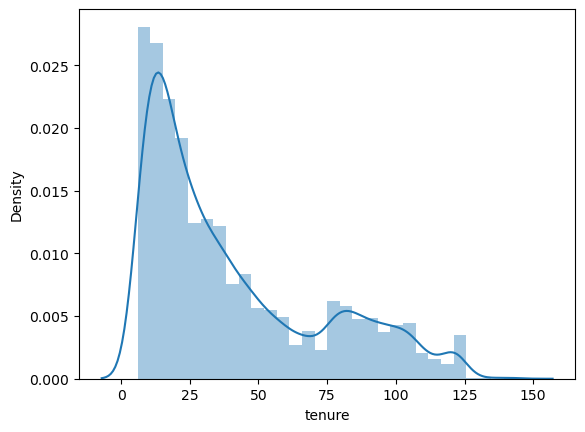

In [41]:
## Distribution of tenure var
sns.distplot(churn_pred_filtered['tenure'],bins=30)
plt.show()

In [42]:
tn_range = [0, 6, 12, 24, 60, 61]
tn_label = [ '0-6 Months', '6-12 Months', '1-2 Yrs', '2-5 Yrs', '5 Yrs and above']
churn_pred_filtered['tenure_range'] = pd.cut(churn_pred_filtered['tenure'], tn_range, labels=tn_label)
churn_pred_filtered['tenure_range'].head()

0    1-2 Yrs
1    1-2 Yrs
2    1-2 Yrs
3    2-5 Yrs
4    1-2 Yrs
Name: tenure_range, dtype: category
Categories (5, object): ['0-6 Months' < '6-12 Months' < '1-2 Yrs' < '2-5 Yrs' < '5 Yrs and above']

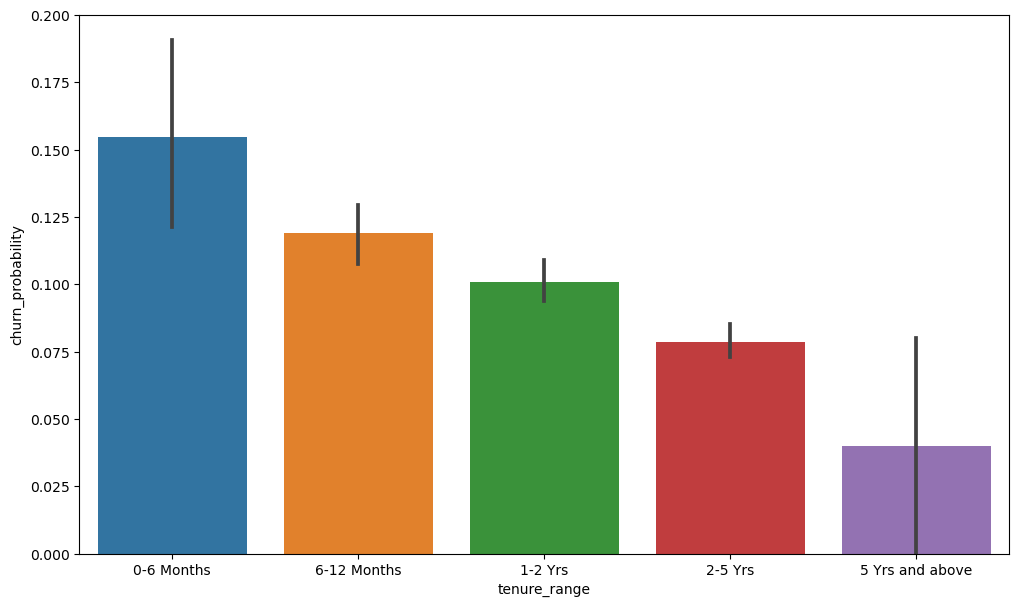

In [43]:
# Plotting a bar plot for tenure range
plt.figure(figsize=[12,7])
sns.barplot(x='tenure_range',y='churn_probability', data=churn_pred_filtered)
plt.show()

###
Observing the data reveals that the highest churn rate occurs within the initial 0-6 months but diminishes gradually as customers remain in the network.

The average revenue per user during the 'good' phase is represented by arpu_6 and arpu_7. Since we have two distinct averages, let's compute an average of these two and eliminate the other columns.

In [44]:
churn_pred_filtered["avg_arpu_6_7"]= (churn_pred_filtered['arpu_6']+churn_pred_filtered['arpu_7'])/2
churn_pred_filtered['avg_arpu_6_7'].head()

0     184.4495
1     478.9215
2    1018.2270
3     362.0215
4     370.7370
Name: avg_arpu_6_7, dtype: float64

In [45]:
## Dropping the original columns as they are derived to a new column for better understanding of the data

churn_pred_filtered.drop(['arpu_6','arpu_7'], axis=1, inplace=True)

In [46]:
churn_pred_filtered['tenure_range']

0            1-2 Yrs
1            1-2 Yrs
2            1-2 Yrs
3            2-5 Yrs
4            1-2 Yrs
            ...     
21008    6-12 Months
21009    6-12 Months
21010        2-5 Yrs
21011    6-12 Months
21012    6-12 Months
Name: tenure_range, Length: 21013, dtype: category
Categories (5, object): ['0-6 Months' < '6-12 Months' < '1-2 Yrs' < '2-5 Yrs' < '5 Yrs and above']

In [47]:
churn_pred_filtered.select_dtypes(type)

""
0
1
2
3
4
...
21008
21009
21010
21011


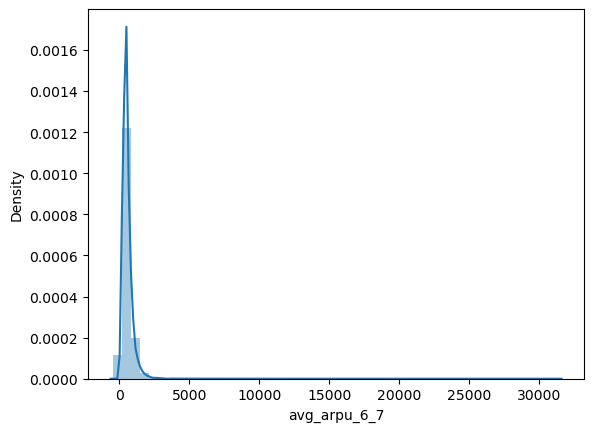

In [48]:
sns.distplot(churn_pred_filtered['avg_arpu_6_7'])
plt.show()

### Inference:

Avg Outgoing Calls & calls on roaming for 6th & 7th months are positively correlated with churn.
Avg Revenue, No. of Recharge for 8th month has negative correlation with churn.

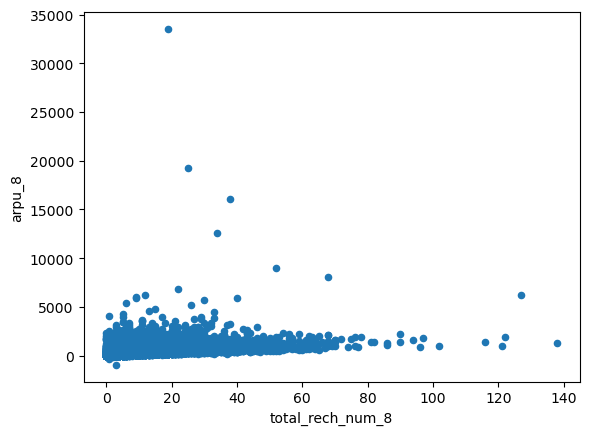

In [49]:
## Scatter plot betwee n total_recharge & avg_revenue for 8th month
churn_pred_filtered[['total_rech_num_8', 'arpu_8']].plot.scatter(x = 'total_rech_num_8',y='arpu_8')
plt.show()

In [50]:
# Creating categories for month 8 column totalrecharge and their count
churn_pred_filtered['total_rech_data_group_8']=pd.cut(churn_pred_filtered['total_rech_data_8'],[-1,0,10,25,100],labels=["No_Recharge","<=10_Recharges","10-25_Recharges",">25_Recharges"])
churn_pred_filtered['total_rech_num_group_8']=pd.cut(churn_pred_filtered['total_rech_num_8'],[-1,0,10,25,1000],labels=["No_Recharge","<=10_Recharges","10-25_Recharges",">25_Recharges"])

					Distribution of total_rech_data_8 variable
 <=10_Recharges     10729
No_Recharge         9833
10-25_Recharges      421
>25_Recharges         30
Name: total_rech_data_group_8, dtype: int64


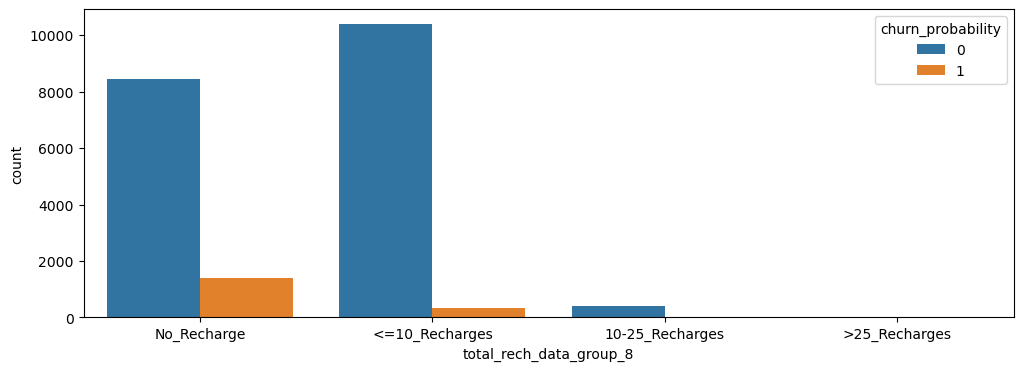

					Distribution of total_rech_num_8 variable
 <=10_Recharges     13533
10-25_Recharges     5829
>25_Recharges       1255
No_Recharge          396
Name: total_rech_num_group_8, dtype: int64


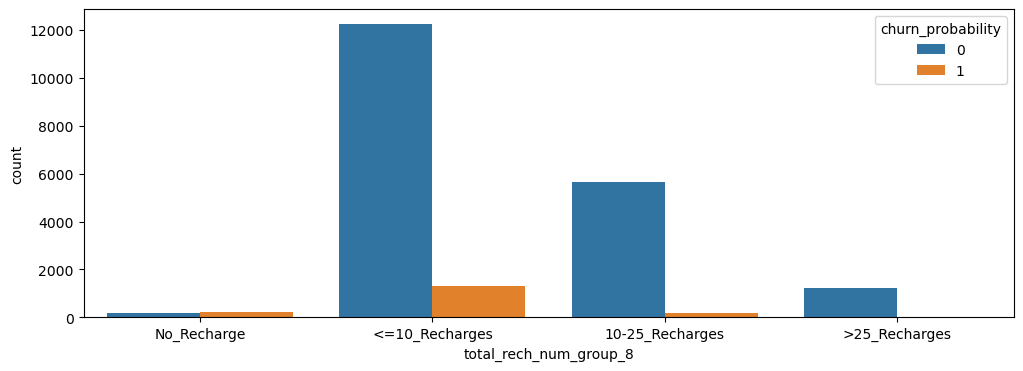

In [51]:
# Plotting the results

plt.figure(figsize=[12,4])
sns.countplot(data=churn_pred_filtered,x="total_rech_data_group_8",hue="churn_probability")
print("\t\t\t\t\tDistribution of total_rech_data_8 variable\n",churn_pred_filtered['total_rech_data_group_8'].value_counts())
plt.show()
plt.figure(figsize=[12,4])
sns.countplot(data=churn_pred_filtered,x="total_rech_num_group_8",hue="churn_probability")
print("\t\t\t\t\tDistribution of total_rech_num_8 variable\n",churn_pred_filtered['total_rech_num_group_8'].value_counts())
plt.show()

#### Observation: Churn rate decreases when there are frequent recharges

In [52]:
churn_pred_filtered.drop(['av_rech_amt_data_8','total_rech_data_8','sachet_2g_6','sachet_2g_7','sachet_3g_6','sachet_3g_7','sachet_3g_8','last_day_rch_amt_6','last_day_rch_amt_7','last_day_rch_amt_8',], axis=1, inplace=True)

In [53]:
churn_pred_filtered.drop(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou','roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 
         'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
         'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
         'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 
         'std_og_t2m_mou_6', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7',
         'std_og_t2c_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'spl_og_mou_6',
         'spl_og_mou_7', 'spl_og_mou_8','total_og_mou_6', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 
         'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8',
         'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8', 
         'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8',
         'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'std_ic_mou_6', 'spl_ic_mou_6', 'spl_ic_mou_7',
         'spl_ic_mou_8', 'isd_ic_mou_6', 'isd_ic_mou_7', 'isd_ic_mou_8',], axis=1, inplace=True)

In [54]:
churn_pred_filtered.shape

(21013, 68)

In [55]:
churn_pred_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21013 entries, 0 to 21012
Data columns (total 68 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   arpu_8                   21013 non-null  float64 
 1   onnet_mou_6              21013 non-null  float64 
 2   onnet_mou_7              21013 non-null  float64 
 3   onnet_mou_8              21013 non-null  float64 
 4   offnet_mou_6             21013 non-null  float64 
 5   offnet_mou_7             21013 non-null  float64 
 6   offnet_mou_8             21013 non-null  float64 
 7   std_og_t2t_mou_8         21013 non-null  float64 
 8   std_og_t2m_mou_8         21013 non-null  float64 
 9   isd_og_mou_8             21013 non-null  float64 
 10  og_others_6              21013 non-null  float64 
 11  og_others_7              21013 non-null  float64 
 12  og_others_8              21013 non-null  float64 
 13  total_og_mou_7           21013 non-null  float64 
 14  total_

In [56]:
churn_pred_filtered.drop(['total_rech_data_group_8','total_rech_num_group_8',] , axis=1, inplace=True)

In [57]:
churn_pred_filtered.shape

(21013, 66)

In [58]:
churn_pred_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21013 entries, 0 to 21012
Data columns (total 66 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   arpu_8             21013 non-null  float64 
 1   onnet_mou_6        21013 non-null  float64 
 2   onnet_mou_7        21013 non-null  float64 
 3   onnet_mou_8        21013 non-null  float64 
 4   offnet_mou_6       21013 non-null  float64 
 5   offnet_mou_7       21013 non-null  float64 
 6   offnet_mou_8       21013 non-null  float64 
 7   std_og_t2t_mou_8   21013 non-null  float64 
 8   std_og_t2m_mou_8   21013 non-null  float64 
 9   isd_og_mou_8       21013 non-null  float64 
 10  og_others_6        21013 non-null  float64 
 11  og_others_7        21013 non-null  float64 
 12  og_others_8        21013 non-null  float64 
 13  total_og_mou_7     21013 non-null  float64 
 14  total_og_mou_8     21013 non-null  float64 
 15  std_ic_mou_8       21013 non-null  float64 
 16  tota

In [59]:
churn_pred_filtered.drop(['tenure_range'] , axis=1, inplace=True)

In [60]:
churn_pred_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21013 entries, 0 to 21012
Data columns (total 65 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   arpu_8             21013 non-null  float64
 1   onnet_mou_6        21013 non-null  float64
 2   onnet_mou_7        21013 non-null  float64
 3   onnet_mou_8        21013 non-null  float64
 4   offnet_mou_6       21013 non-null  float64
 5   offnet_mou_7       21013 non-null  float64
 6   offnet_mou_8       21013 non-null  float64
 7   std_og_t2t_mou_8   21013 non-null  float64
 8   std_og_t2m_mou_8   21013 non-null  float64
 9   isd_og_mou_8       21013 non-null  float64
 10  og_others_6        21013 non-null  float64
 11  og_others_7        21013 non-null  float64
 12  og_others_8        21013 non-null  float64
 13  total_og_mou_7     21013 non-null  float64
 14  total_og_mou_8     21013 non-null  float64
 15  std_ic_mou_8       21013 non-null  float64
 16  total_ic_mou_8     210

In [61]:
churn_rate = (sum(churn_pred_filtered["churn_probability"])/len(churn_pred_filtered["churn_probability"].index))*100
churn_rate

8.275829248560415

## Train-Test split

In [62]:
X = churn_pred_filtered.drop("churn_probability", axis = 1)
y = churn_pred_filtered.churn_probability
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 4, stratify = y)

In [63]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(16810, 64)
(16810,)
(4203, 64)
(4203,)


## Scaling

In [64]:
X_train.head()

,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,isd_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_7,total_og_mou_8,std_ic_mou_8,total_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,fb_user_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,tenure,avg_arpu_6_7
14734,716.870,64.96,66.91,100.43,327.03,579.19,454.64,0.46,17.61,1.69,0.00,0.0,0.0,646.11,556.78,140.26,996.06,0.0,0.0,0.0,4,3,2,790,1050,0,790,145.0,145.0,145.0,0.0,0.0,0.0,1.0,1.0,1.0,18.32,26.17,5.53,503.31,295.73,553.70,122.07,122.07,122.07,131.97,122.07,122.07,0.0,0.0,0.0,0,0,0,0,1,1,1,1.0,100.39,110.66,386.73,90.0,659.2450
17095,102.095,3.21,9.84,1.01,25.54,26.23,20.94,0.00,0.00,0.00,0.43,0.0,0.0,37.88,25.23,16.14,133.28,0.0,0.0,0.0,15,15,11,115,30,67,25,25.0,25.0,25.0,8.0,9.0,6.0,0.0,0.0,0.0,588.32,590.35,198.35,0.00,0.00,0.00,0.00,0.00,0.00,0.40,0.70,0.65,0.0,0.0,0.0,0,0,0,6,0,0,0,1.0,0.00,0.00,0.00,24.0,216.4250
2602,606.283,14.36,2.89,6.86,356.19,364.28,516.36,0.00,342.28,0.00,0.00,0.0,0.0,306.36,350.74,247.24,261.24,0.0,0.0,0.0,12,13,15,654,86,50,59,274.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,104.52,0.00,0.00,0.00,0.00,0.00,0.00,0.42,0.84,26.91,8.80,9.09,0.0,-1.0,-1.0,1,0,0,0,0,0,0,-1.0,0.00,0.00,0.00,81.0,412.9240
7619,170.790,42.88,10.63,16.46,113.84,132.93,107.43,0.00,0.43,0.00,0.00,0.0,0.0,143.56,123.89,0.00,153.24,0.0,0.0,0.0,5,3,2,200,250,250,200,154.0,154.0,154.0,1.0,1.0,1.0,0.0,0.0,0.0,0.65,1.21,1.06,103.27,137.66,273.11,0.39,1.17,6.18,0.00,0.00,0.00,0.0,0.0,0.0,1,1,1,0,0,0,0,1.0,4.28,64.47,25.67,49.0,326.7205
19276,773.809,86.54,75.19,57.01,384.64,581.58,704.86,0.38,13.40,0.00,0.00,0.0,0.0,208.69,13.78,1.59,1.59,0.0,0.0,0.0,7,6,10,1044,110,110,150,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.52,0.42,0.84,11.30,8.80,9.09,-1.0,-1.0,-1.0,0,0,0,0,0,0,0,-1.0,0.00,0.00,0.00,38.0,533.3280


In [65]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16810 entries, 14734 to 20561
Data columns (total 64 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   arpu_8            16810 non-null  float64
 1   onnet_mou_6       16810 non-null  float64
 2   onnet_mou_7       16810 non-null  float64
 3   onnet_mou_8       16810 non-null  float64
 4   offnet_mou_6      16810 non-null  float64
 5   offnet_mou_7      16810 non-null  float64
 6   offnet_mou_8      16810 non-null  float64
 7   std_og_t2t_mou_8  16810 non-null  float64
 8   std_og_t2m_mou_8  16810 non-null  float64
 9   isd_og_mou_8      16810 non-null  float64
 10  og_others_6       16810 non-null  float64
 11  og_others_7       16810 non-null  float64
 12  og_others_8       16810 non-null  float64
 13  total_og_mou_7    16810 non-null  float64
 14  total_og_mou_8    16810 non-null  float64
 15  std_ic_mou_8      16810 non-null  float64
 16  total_ic_mou_8    16810 non-null  fl

In [66]:
num_col = X_train.select_dtypes(include = ['int64','float64']).columns.tolist()

In [67]:
from sklearn import preprocessing
scaler = MinMaxScaler()
X_train[num_col] = scaler.fit_transform(X_train[num_col])

In [68]:
X_train.describe()

,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,isd_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_7,total_og_mou_8,std_ic_mou_8,total_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,fb_user_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,tenure,avg_arpu_6_7
count,16810.000000,16810.000000,16810.000000,16810.000000,16810.000000,16810.000000,16810.000000,16810.000000,16810.000000,16810.000000,16810.000000,16810.000000,16810.000000,16810.000000,16810.000000,16810.000000,16810.000000,16810.000000,16810.000000,16810.000000,16810.000000,16810.000000,16810.000000,16810.000000,16810.000000,16810.000000,16810.000000,16810.000000,16810.000000,16810.000000,16810.000000,16810.000000,16810.000000,16810.000000,16810.000000,16810.000000,16810.000000,16810.000000,16810.000000,16810.000000,16810.000000,16810.000000,16810.000000,16810.000000,16810.000000,16810.000000,16810.000000,16810.000000,16810.000000,16810.000000,16810.000000,16810.000000,16810.000000,16810.000000,16810.000000,16810.000000,16810.000000,16810.000000,16810.000000,16810.000000,16810.000000,16810.000000,16810.000000,16810.000000
mean,0.042056,0.035496,0.032929,0.023578,0.044915,0.056024,0.024008,0.018707,0.011397,0.000540,0.001130,0.000160,0.000145,0.075641,0.039182,0.011691,0.057686,0.000949,0.001047,0.001089,0.069591,0.084902,0.072093,0.012791,0.042278,0.051608,0.035839,0.050098,0.051144,0.046455,0.049179,0.038338,0.038016,0.014558,0.013455,0.009184,0.012300,0.015875,0.009530,0.007543,0.013232,0.011911,0.017223,0.018840,0.023746,0.016508,0.016848,0.025019,0.284741,0.289976,0.271862,0.044244,0.036752,0.030553,0.023908,0.023980,0.014065,0.013192,0.503896,0.013150,0.019179,0.014208,0.250341,0.031616
std,0.015095,0.062564,0.059537,0.046130,0.056660,0.071754,0.033239,0.050574,0.028597,0.010239,0.008504,0.008366,0.008429,0.085754,0.049330,0.034757,0.072650,0.012629,0.011877,0.012684,0.054723,0.068446,0.066880,0.014058,0.044892,0.052635,0.037996,0.072916,0.073647,0.070903,0.067537,0.054209,0.053770,0.040015,0.038174,0.029219,0.032373,0.041917,0.028504,0.020593,0.033935,0.032362,0.035352,0.036387,0.049275,0.031357,0.034403,0.044501,0.260520,0.259653,0.260549,0.110072,0.090205,0.080685,0.057787,0.066643,0.040164,0.038713,0.485741,0.033407,0.048073,0.038146,0.231182,0.013929
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.034122,0.002697,0.002281,0.001512,0.009738,0.011674,0.004525,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.014041,0.005212,0.000286,0.013008,0.000000,0.000000,0.000000,0.035294,0.043478,0.028986,0.005516,0.027431,0.033343,0.011238,0.000000,0.000000,0.000000,0.029412,0.020833,0.022727,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004116,0.005285,0.005959,0.005251,0.004539,0.009600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0652

## Data Imbalance 

In [69]:
#using SMOTE technique to handle data imbalance
smote = SMOTE(random_state=42)
X_train_sm,y_train_sm = smote.fit_resample(X_train,y_train)

In [70]:
print("Dimension of X_train_sm Shape:", X_train_sm.shape)
print("Dimension of y_train_sm Shape:", y_train_sm.shape)

Dimension of X_train_sm Shape: (30838, 64)
Dimension of y_train_sm Shape: (30838,)


In [71]:
# creating a function to plot the roc curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Prediction Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

## PCA

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=10)

In [73]:
X_train.shape

(16810, 64)

In [74]:
pca = PCA(random_state=42)

In [75]:
pca.fit(X_train)

PCA(random_state=42)

In [76]:
pca.components_

array([[ 5.88882809e-04, -7.36198762e-02, -8.89172984e-02, ...,
         1.68045287e-01,  5.25413557e-05,  1.57077705e-04],
       [ 2.89057514e-01,  1.40697910e-01,  1.98620226e-01, ...,
         4.01160516e-02,  1.45818039e-05,  2.28003241e-01],
       [ 2.09957365e-01, -3.55571175e-01, -4.35932502e-01, ...,
        -9.65272977e-03,  3.00035505e-03,  1.33172946e-01],
       ...,
       [ 3.27375739e-05, -1.12735286e-05,  2.13377010e-05, ...,
        -1.62820175e-05, -6.96603994e-06,  2.17760571e-05],
       [ 4.82930925e-06, -9.68373927e-06, -3.07555981e-05, ...,
         2.07525247e-06, -1.37152019e-04, -2.78157335e-07],
       [-1.75789004e-06,  3.29330654e-06,  1.38961764e-06, ...,
         1.47874531e-06,  1.82972428e-05, -5.90263262e-06]])

In [77]:
pca.components_.shape

(64, 64)

In [78]:
pca.explained_variance_ratio_

array([3.34347171e-01, 2.45119213e-01, 8.37738242e-02, 6.25740866e-02,
       4.43897011e-02, 3.36949561e-02, 3.34746933e-02, 3.00322297e-02,
       2.71993656e-02, 1.63963447e-02, 1.33412036e-02, 1.27514796e-02,
       7.36876245e-03, 6.96586566e-03, 6.58465482e-03, 5.56725655e-03,
       4.90495055e-03, 4.75700413e-03, 4.17710050e-03, 3.95854760e-03,
       3.64319291e-03, 2.27289558e-03, 2.24694129e-03, 1.88329767e-03,
       1.50960148e-03, 1.41832343e-03, 1.32668630e-03, 1.11713690e-03,
       7.40735166e-04, 7.17554833e-04, 3.15541502e-04, 3.08215777e-04,
       2.81276338e-04, 1.87810626e-04, 1.73100325e-04, 1.63456227e-04,
       1.20564617e-04, 8.13272670e-05, 7.03716455e-05, 1.68009294e-05,
       7.40118271e-06, 6.27376672e-06, 3.54147482e-06, 3.09058219e-06,
       1.84859362e-06, 1.66385887e-06, 1.50413613e-06, 3.90249013e-07,
       3.39249305e-07, 2.58215386e-07, 1.85541653e-07, 6.77474089e-08,
       5.48420406e-08, 3.37684211e-08, 2.59565006e-08, 2.30969512e-08,
      

In [79]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

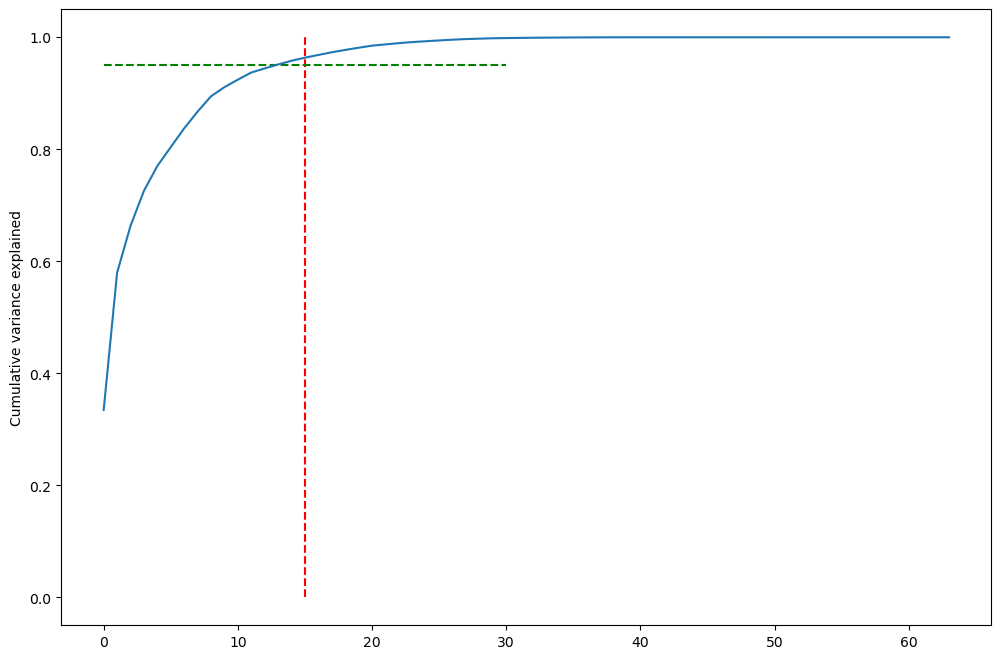

In [80]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=15, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=30, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

## Using Incremental PCA for better results

In [81]:
pca_final = IncrementalPCA(n_components=18)

In [82]:
df_train_pca = pca_final.fit_transform(X_train)

In [83]:
df_train_pca.shape

(16810, 18)

In [84]:
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(4203, 18)

## Logistic regression using PCA and Hyperparameters

In [85]:
# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as recall as we are more focused on acheiving the higher sensitivity than the accuracy
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'accuracy', 
                        cv = 5, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(df_train_pca, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='accuracy', verbose=1)

In [86]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.057529,0.008196,0.001349,0.000374,0.01,{'C': 0.01},0.92207,0.921773,0.922368,0.919393,0.918798,0.92088,0.001481,1,0.921475,0.921847,0.921475,0.922888,0.92207,0.921951,0.000521
1,0.051824,0.008544,0.000802,0.000401,0.1,{'C': 0.1},0.92207,0.921773,0.922368,0.919393,0.918798,0.92088,0.001481,1,0.921475,0.921847,0.921475,0.922888,0.92207,0.921951,0.000521
2,0.049007,0.003490,0.000600,0.000490,1,{'C': 1},0.92207,0.921773,0.922368,0.919393,0.918798,0.92088,0.001481,1,0.921475,0.921847,0.921475,0.922814,0.92207,0.921936,0.000494
3,0.048587,0.003945,0.000810,0.000514,10,{'C': 10},0.92207,0.921773,0.922368,0.919393,0.918798,0.92088,0.001481,1,0.921475,0.921847,0.921475,0.922888,0.92207,0.921951,0.000521
4,0.050206,0.004589,0.000837,0.000425,100,{'C': 100},0.92207,0.921773,0.922368,0.919393,0.918798,0.92088,0.001481,1,0.921475,0.921773,0.921475,0.922814,0.92207,0.921921,0.000498
5,0.047928,0.004226,0.000913,0.000205,1000,{'C': 1000},0.92207,0.921773,0.922368,0.919393,0.918798,0.92088,0.001481,1,0.921475,0.921847,0.921475,0.922888,0.92207,0.921951,0.000521


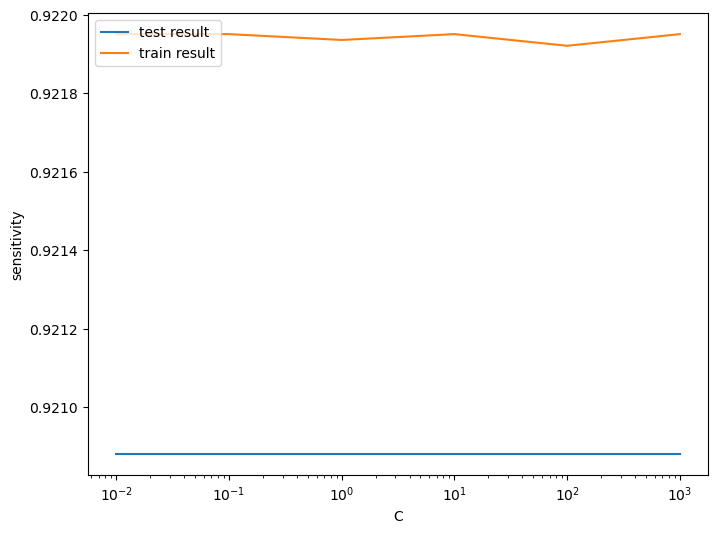

In [87]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [88]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test sensitivity is {0} at C = {1}".format(best_score, best_C))

 The highest test sensitivity is 0.9208804283164783 at C = 0.01


In [89]:
log_reg = LogisticRegression(C=best_C)

### Prediction on train set

In [90]:
log_reg.fit(df_train_pca, y_train)
y_train_pred = log_reg.predict(df_train_pca)

In [91]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[15268   132]
 [ 1183   227]]


In [92]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [93]:
print("Accuracy: ",metrics.accuracy_score(y_train, y_train_pred))
print("Sensitivity: ",TP / float(TP+FN))
print("Specificity: ", TN / float(TN+FP))
print("Precision: ",metrics.precision_score(y_train, y_train_pred)*100)
print("Recall: ",metrics.recall_score(y_train, y_train_pred)*100)

Accuracy:  0.921772754312909
Sensitivity:  0.16099290780141845
Specificity:  0.9914285714285714
Precision:  63.231197771587745
Recall:  16.099290780141846


### Prediction on test set

In [94]:
y_test_pred = log_reg.predict(df_test_pca)

In [95]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[3839   35]
 [ 278   51]]


In [96]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [97]:
# Accuracy
print("Accuracy: ",metrics.accuracy_score(y_test, y_test_pred))
print("Sensitivity: ",TP / float(TP+FN))
print("Specificity: ", TN / float(TN+FP))
print("Precision: ",metrics.precision_score(y_test, y_test_pred)*100)
print("Recall: ",metrics.recall_score(y_test, y_test_pred)*100)

Accuracy:  0.9255293837734951
Sensitivity:  0.15501519756838905
Specificity:  0.9909654104284977
Precision:  59.30232558139535
Recall:  15.501519756838904


## Decision Tree with PCA and Hyperparameters

In [98]:
from sklearn.tree import DecisionTreeClassifier

In [99]:
dt = DecisionTreeClassifier(random_state=42)

In [100]:
from sklearn.model_selection import GridSearchCV

In [101]:
#tuning
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'min_samples_split': [50, 150, 50]
}

In [102]:
# Grid search model
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [103]:
grid_search.fit(df_train_pca, y_train)

Fitting 4 folds for each of 75 candidates, totalling 300 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'min_samples_split': [50, 150, 50]},
             scoring='accuracy', verbose=1)

In [104]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.080202,0.007476,0.002117,0.000233,2,5,50,"{'max_depth': 2, 'min_samples_leaf': 5, 'min_s...",0.916012,0.916012,0.91623,0.91623,0.916121,0.000109,44
1,0.076897,0.005717,0.001500,0.000500,2,5,150,"{'max_depth': 2, 'min_samples_leaf': 5, 'min_s...",0.916012,0.916012,0.91623,0.91623,0.916121,0.000109,44
2,0.077705,0.005647,0.003026,0.000592,2,5,50,"{'max_depth': 2, 'min_samples_leaf': 5, 'min_s...",0.916012,0.916012,0.91623,0.91623,0.916121,0.000109,44
3,0.084741,0.004219,0.001766,0.000236,2,10,50,"{'max_depth': 2, 'min_samples_leaf': 10, 'min_...",0.916012,0.916012,0.91623,0.91623,0.916121,0.000109,44
4,0.086378,0.009988,0.001375,0.000423,2,10,150,"{'max_depth': 2, 'min_samples_leaf': 10, 'min_...",0.916012,0.916012,0.91623,0.91623,0.916121,0.000109,44


In [105]:
score_df.nlargest(5,"mean_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
54,0.287339,0.017732,0.002253,0.001086,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.921723,0.924102,0.924322,0.925274,0.923855,0.001308,1
56,0.308888,0.029419,0.002252,0.000829,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.921723,0.924102,0.924322,0.925274,0.923855,0.001308,1
69,0.283871,0.014082,0.001252,0.000432,20,50,50,"{'max_depth': 20, 'min_samples_leaf': 50, 'min...",0.921723,0.924102,0.924322,0.925274,0.923855,0.001308,1
71,0.288152,0.022131,0.001506,0.000503,20,50,50,"{'max_depth': 20, 'min_samples_leaf': 50, 'min...",0.921723,0.924102,0.924322,0.925274,0.923855,0.001308,1
55,0.307844,0.034902,0.002383,0.001302,10,50,150,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.922436,0.924578,0.924322,0.923132,0.923617,0.000873,5


In [106]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50,
                       random_state=42)

In [107]:
dt_best = DecisionTreeClassifier( random_state = 42,
                                  max_depth=10, 
                                  min_samples_leaf=20,
                                  min_samples_split=50)

In [108]:
dt_best.fit(df_train_pca, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=20, min_samples_split=50,
                       random_state=42)

In [109]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [110]:
def evaluate_model(model):
    print("Train Accuracy :", accuracy_score(y_train, model.predict(df_train_pca)))
    print("Precision: ",metrics.precision_score(y_train, model.predict(df_train_pca))*100)
    print("Recall: ",metrics.recall_score(y_train, model.predict(df_train_pca))*100)
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, model.predict(df_train_pca)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, model.predict(df_test_pca)))
    print("Precision: ",metrics.precision_score(y_test, model.predict(df_test_pca))*100)
    print("Recall: ",metrics.recall_score(y_test, model.predict(df_test_pca))*100)
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, model.predict(df_test_pca)))



In [111]:
evaluate_model(dt_best)

Train Accuracy : 0.9372992266508031
Precision:  69.18103448275862
Recall:  45.53191489361702
Train Confusion Matrix:
[[15114   286]
 [  768   642]]
--------------------------------------------------
Test Accuracy : 0.9226742802759933
Precision:  50.877192982456144
Recall:  35.25835866261398
Test Confusion Matrix:
[[3762  112]
 [ 213  116]]


## Random forest with PCA and hyperparameters

In [112]:
from sklearn.ensemble import RandomForestClassifier

In [113]:
max_features = int(round(np.sqrt(X_train.shape[1])))    # number of variables to consider to split each node
print(max_features)

8


In [114]:
rf = RandomForestClassifier(n_estimators=100, max_depth=5, max_features=9, random_state=100, oob_score=True, verbose=1)

In [115]:
rf.fit(df_train_pca, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    6.1s finished


RandomForestClassifier(max_depth=5, max_features=9, oob_score=True,
                       random_state=100, verbose=1)

In [116]:
rf.oob_score_

0.9241522903033909

### Hyperparameter tuning

In [117]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [118]:
params = {
    'max_depth': [2,3,5, 10, 20],
    'min_samples_leaf': [50,100, 150],
    'min_samples_split': [ 100, 150, 200],
    'n_estimators': [100, 200 ,300]
}

In [119]:
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [120]:
grid_search.fit(df_train_pca, y_train)

Fitting 4 folds for each of 135 candidates, totalling 540 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [50, 100, 150],
                         'min_samples_split': [100, 150, 200],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=1)

In [121]:
grid_search.best_score_

0.921356334401336

In [122]:
grid_search.best_params_

{'max_depth': 20,
 'min_samples_leaf': 50,
 'min_samples_split': 100,
 'n_estimators': 300}

In [123]:
rfc_model = RandomForestClassifier(bootstrap=True,
                             max_depth=20,
                             min_samples_leaf=50, 
                             min_samples_split=100,
                             n_estimators=300)

In [124]:
rfc_model.fit(df_train_pca, y_train)

RandomForestClassifier(max_depth=20, min_samples_leaf=50, min_samples_split=100,
                       n_estimators=300)

In [125]:
evaluate_model(rfc_model)

Train Accuracy : 0.9296847114812612
Precision:  77.40384615384616
Recall:  22.836879432624112
Train Confusion Matrix:
[[15306    94]
 [ 1088   322]]
--------------------------------------------------
Test Accuracy : 0.9283844872709969
Precision:  65.21739130434783
Recall:  18.237082066869302
Test Confusion Matrix:
[[3842   32]
 [ 269   60]]


### Observation: the optimal parameters using random forest resulted in an accuracy of 92% in both train and test dataset 

## Building model with Random forest with the test.csv to generate submission.csv file

In [126]:
test_data = pd.read_csv("test.csv")

In [127]:
test_data.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,69999,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,91.882,65.330,64.445,31.78,20.23,23.11,60.16,32.16,34.83,0.00,0.00,0.00,0.00,0.00,0.00,24.88,20.23,21.06,18.13,10.89,8.36,0.00,13.58,0.00,0.0,0.00,0.03,43.01,44.71,29.43,6.90,0.00,2.05,42.03,7.68,26.43,0.0,0.0,0.0,0.0,0.0,0.0,48.93,7.68,28.48,0.0,0.0,0.0,0.00,0.00,0.03,0.0,0.0,0.0,91.94,52.39,57.94,30.33,37.56,21.98,10.21,4.59,9.53,0.26,0.00,0.00,40.81,42.16,31.51,0.00,0.00,0.00,0.36,1.04,4.34,0.0,0.0,0.00,0.0,0.0,0.0,0.36,1.04,4.34,41.73,43.56,36.26,0.54,0.34,0.39,0.00,0.00,0.00,0.0,0.0,0.00,5,5,4,103,90,60,50,30,30,6/21/2014,7/26/2014,8/24/2014,30,30,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1692,0.00,0.00,0.00
1,70000,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,414.168,515.568,360.868,75.51,41.21,19.84,474.34,621.84,394.94,0.00,0.00,0.00,0.00,0.00,0.00,75.51,41.21,19.84,473.61,598.08,377.26,0.73,0.00,0.00,0.0,0.00,0.00,549.86,639.29,397.11,0.00,0.00,0.00,0.00,23.76,17.68,0.0,0.0,0.0,0.0,0.0,0.0,0.00,23.76,17.68,0.0,0.0,0.8,0.00,0.00,0.00,0.0,0.0,0.0,549.86,663.06,415.59,19.99,26.95,2.61,160.19,122.29,184.81,1.49,0.00,0.00,181.69,149.24,187.43,0.00,0.00,0.00,0.00,12.51,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,12.51,0.00,296.33,339.64,281.66,0.00,0.00,0.00,114.63,177.88,94.23,0.0,0.0,0.00,5,4,5,500,500,500,250,250,250,6/19/2014,7/16/2014,8/24/2014,250,0,0,NaN,NaN,Na

In [128]:
test_data.shape

(30000, 171)

In [129]:
churn_id = test_data['id']

In [130]:
test_data['tenure'] = (test_data['aon']/30).round(0)
test_data["avg_arpu_6_7"]= (test_data['arpu_6']+test_data['arpu_7'])/2

test_data = test_data[X.columns]

In [131]:
test_data.shape

(30000, 64)

In [132]:
test_data_null = test_data.isnull().sum().sum() / np.product(test_data.shape) * 100
test_data_null

23.206458333333334

In [133]:
# Checkin null values in test
test_data.isna().sum() 

arpu_8                  0
onnet_mou_6          1169
onnet_mou_7          1172
onnet_mou_8          1675
offnet_mou_6         1169
offnet_mou_7         1172
offnet_mou_8         1675
std_og_t2t_mou_8     1675
std_og_t2m_mou_8     1675
isd_og_mou_8         1675
og_others_6          1169
og_others_7          1172
og_others_8          1675
total_og_mou_7          0
total_og_mou_8          0
std_ic_mou_8         1675
total_ic_mou_8          0
ic_others_6          1169
ic_others_7          1172
ic_others_8          1675
total_rech_num_6        0
total_rech_num_7        0
total_rech_num_8        0
total_rech_amt_8        0
max_rech_amt_6          0
max_rech_amt_7          0
max_rech_amt_8          0
max_rech_data_6     22415
max_rech_data_7     22294
max_rech_data_8     22078
count_rech_2g_6     22415
count_rech_2g_7     22294
count_rech_2g_8     22078
count_rech_3g_6     22415
count_rech_3g_7     22294
count_rech_3g_8     22078
vol_2g_mb_6             0
vol_2g_mb_7             0
vol_2g_mb_8 

In [134]:
for col in test_data.columns:
    null_col = test_data[col].isnull().sum() / test_data.shape[0] * 100
    if null_col > 0:
        test_data[col] = test_data[col].fillna(test_data[col].mode()[0])

In [135]:
test_data.isna().sum()

arpu_8              0
onnet_mou_6         0
onnet_mou_7         0
onnet_mou_8         0
offnet_mou_6        0
offnet_mou_7        0
offnet_mou_8        0
std_og_t2t_mou_8    0
std_og_t2m_mou_8    0
isd_og_mou_8        0
og_others_6         0
og_others_7         0
og_others_8         0
total_og_mou_7      0
total_og_mou_8      0
std_ic_mou_8        0
total_ic_mou_8      0
ic_others_6         0
ic_others_7         0
ic_others_8         0
total_rech_num_6    0
total_rech_num_7    0
total_rech_num_8    0
total_rech_amt_8    0
max_rech_amt_6      0
max_rech_amt_7      0
max_rech_amt_8      0
max_rech_data_6     0
max_rech_data_7     0
max_rech_data_8     0
count_rech_2g_6     0
count_rech_2g_7     0
count_rech_2g_8     0
count_rech_3g_6     0
count_rech_3g_7     0
count_rech_3g_8     0
vol_2g_mb_6         0
vol_2g_mb_7         0
vol_2g_mb_8         0
vol_3g_mb_6         0
vol_3g_mb_7         0
vol_3g_mb_8         0
arpu_3g_6           0
arpu_3g_7           0
arpu_3g_8           0
arpu_2g_6 

### PCA on test.csv

In [136]:
test_data_final = pca_final.transform(test_data)

In [137]:
test_data_final.shape

(30000, 18)

### Random forest model

In [138]:
predict_probabilty = rfc_model.predict(test_data_final)

In [139]:
predict_probabilty.shape

(30000,)

In [140]:
final_prediction = pd.DataFrame({'id':churn_id,'churn_probability':predict_probabilty})

In [141]:
final_prediction.to_csv('submission.csv',index=False)

### Randomforest without PCA for finding important features

In [142]:
# Using optimal hyper params value to tain the model to get important features.
rf = RandomForestClassifier(n_estimators=300, 
                            max_depth=20, 
                            min_samples_leaf= 50, 
                            max_features=5, 
                            min_samples_split= 100,
                            random_state=100, oob_score=True)

rf.fit(X_train, y_train)

print(f'OOB Score : {rf.oob_score_}')

OOB Score : 0.9417608566329566


In [143]:
print(rf.feature_importances_)

[1.01465591e-01 7.76264953e-03 8.87327341e-03 3.02218857e-02
 8.68907835e-03 8.88048335e-03 4.49247514e-02 7.09649756e-03
 2.48511639e-02 3.38168648e-04 1.19073715e-03 0.00000000e+00
 0.00000000e+00 2.03743592e-02 1.22468273e-01 3.03521487e-02
 1.86996292e-01 5.97767909e-04 6.16222233e-04 3.66213706e-03
 7.84335606e-03 4.93080528e-03 2.60721735e-02 1.00625799e-01
 3.29553556e-03 8.37620972e-03 8.30681642e-02 2.43473119e-03
 8.25429872e-03 1.77229672e-02 8.60615690e-04 7.88580682e-04
 1.71237321e-03 3.97183618e-04 6.66183361e-04 1.54053056e-03
 2.92704009e-03 3.62209477e-03 1.79865235e-02 9.57992546e-04
 5.00444621e-03 6.18870199e-03 1.40923568e-03 1.61682212e-03
 5.28538291e-03 1.46727892e-03 2.51238832e-03 4.03130436e-03
 1.11901101e-03 4.02276004e-03 1.72893876e-02 1.34720019e-04
 2.80585384e-04 7.99253030e-04 1.56456063e-03 3.95964281e-04
 2.68854739e-04 5.23195368e-04 2.03323533e-02 5.45464952e-03
 1.30649088e-03 9.84990319e-04 6.20453939e-03 8.35848579e-03]


In [144]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf.feature_importances_
})
imp_df.sort_values(by="Imp", ascending=False).head(10)

,Varname,Imp
16,total_ic_mou_8,0.186996
14,total_og_mou_8,0.122468
0,arpu_8,0.101466
23,total_rech_amt_8,0.100626
26,max_rech_amt_8,0.083068
6,offnet_mou_8,0.044925
15,std_ic_mou_8,0.030352
3,onnet_mou_8,0.030222
22,total_rech_num_8,0.026072
8,std_og_t2m_mou_8,0.024851


## According to Random Forest Model trained this is the list of Important Features

| Variables   | Coefficients |
|---------------------|--------------|
|total_ic_mou_8|0.186996|
|total_og_mou_8|0.122468|
|arpu_8|0.101466|
|total_rech_amt_8|0.100626|
|max_rech_amt_8|0.083068|
|offnet_mou_8|0.044925|
|std_ic_mou_8|0.030352|
|onnet_mou_8|0.030222|
|total_rech_num_8|0.026072|
|std_og_t2m_mou_8|0.024851|

## Conclusion

The Random Forest model demonstrates superior predictive capability for churn based on accuracy as the performance metric.

Target the customers, whose minutes of usage of the incoming local calls and outgoing calls are less in the action phase (mostly in the month of August).

Target the customers who have good average revenue in the month of August (arpu).

#### Logistic regression with PCA Train Accuracy : ~92% . Test Accuracy : ~92%

#### Decision Tree with PCA: Train Accuracy : ~93% . Test Accuracy : ~92%

#### Random Forest with PCA: Train Accuracy :~ 92% . Test Accuracy :~ 92%